In [23]:
import pandas as pd
import matplotlib.pyplot as plt

sub_df = pd.read_csv('data.csv')

# cutting off colums after 14
sub_df = sub_df.iloc[:,:14]
print(sub_df.shape)

# convert the datatype of Date in to datetime for filter
sub_df['Date'] = pd.to_datetime(sub_df['Date'])

# extract data after 2016/01/01
sub_df = sub_df[sub_df['Date'] >= '2016/01/01']

# drop na
sub_df = sub_df.dropna(axis=0)

print(sub_df.head())

(340539, 14)
   Unnamed: 0            PdId  IncidntNum  Incident Code       Category  \
0           7  16010127305073   160101273           5073       BURGLARY   
1           8  17004924306243   170049243           6243  LARCENY/THEFT   
2           9  16065828006244   160658280           6244  LARCENY/THEFT   
3          10  18032260316100   180322603          16100  DRUG/NARCOTIC   
4          11  17612518006244   176125180           6244  LARCENY/THEFT   

                       Descript  DayOfWeek       Date   Time PdDistrict  \
0      BURGLARY, UNLAWFUL ENTRY  Wednesday 2016-02-03  20:30    MISSION   
1  PETTY THEFT FROM LOCKED AUTO  Wednesday 2017-01-18  18:20    TARAVAL   
2  GRAND THEFT FROM LOCKED AUTO     Sunday 2016-08-14  21:00    TARAVAL   
3          POSSESSION OF HEROIN    Tuesday 2018-05-01  13:27   SOUTHERN   
4  GRAND THEFT FROM LOCKED AUTO    Tuesday 2017-05-16  13:00   RICHMOND   

       Resolution                       Address           X          Y  
0  ARREST, B

In [24]:
print(sub_df['PdId'].unique()) # Large Random Numbers?
print(sub_df['PdDistrict'].unique()) # X, Y in place of District Areas

# drop PdId, PdDistrict
sub_df = sub_df.drop(columns = ['PdId', 'PdDistrict'])
print(sub_df.info())

[16010127305073 17004924306243 16065828006244 ... 17078486916110
 18014823304138 16044156851040]
['MISSION' 'TARAVAL' 'SOUTHERN' 'RICHMOND' 'BAYVIEW' 'NORTHERN' 'PARK'
 'CENTRAL' 'INGLESIDE' 'TENDERLOIN']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 340539 entries, 0 to 340538
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     340539 non-null  int64         
 1   IncidntNum     340539 non-null  int64         
 2   Incident Code  340539 non-null  int64         
 3   Category       340539 non-null  object        
 4   Descript       340539 non-null  object        
 5   DayOfWeek      340539 non-null  object        
 6   Date           340539 non-null  datetime64[ns]
 7   Time           340539 non-null  object        
 8   Resolution     340539 non-null  object        
 9   Address        340539 non-null  object        
 10  X              340539 non-null  float64       
 11  Y  

In [25]:
# values in Category
print(sub_df['Category'].unique())
sub_df['Category'].unique().shape

['BURGLARY' 'LARCENY/THEFT' 'DRUG/NARCOTIC' 'DRIVING UNDER THE INFLUENCE'
 'VANDALISM' 'OTHER OFFENSES' 'DRUNKENNESS' 'ASSAULT' 'MISSING PERSON'
 'NON-CRIMINAL' 'ROBBERY' 'VEHICLE THEFT' 'SUSPICIOUS OCC' 'TRESPASS'
 'WARRANTS' 'FORGERY/COUNTERFEITING' 'STOLEN PROPERTY'
 'SEX OFFENSES, FORCIBLE' 'FRAUD' 'SECONDARY CODES' 'PROSTITUTION'
 'RECOVERED VEHICLE' 'BRIBERY' 'ARSON' 'DISORDERLY CONDUCT' 'WEAPON LAWS'
 'LIQUOR LAWS' 'EXTORTION' 'SUICIDE' 'KIDNAPPING'
 'SEX OFFENSES, NON FORCIBLE' 'BAD CHECKS' 'EMBEZZLEMENT' 'LOITERING'
 'GAMBLING' 'TREA' 'PORNOGRAPHY/OBSCENE MAT']


(37,)

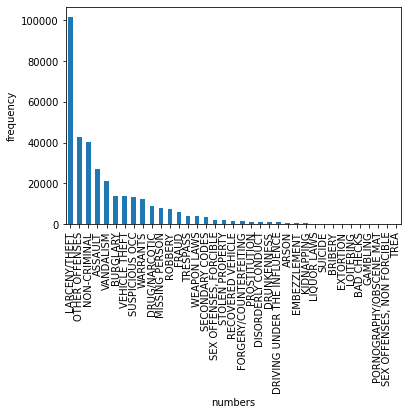

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sub_df['Category'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency')

plt.show()

In [27]:
# frequency of each category
print(sub_df['Category'].value_counts())

LARCENY/THEFT                  101688
OTHER OFFENSES                  42690
NON-CRIMINAL                    40438
ASSAULT                         27043
VANDALISM                       21061
BURGLARY                        13715
VEHICLE THEFT                   13591
SUSPICIOUS OCC                  13502
WARRANTS                        12434
DRUG/NARCOTIC                    8936
MISSING PERSON                   7943
ROBBERY                          7545
FRAUD                            5992
TRESPASS                         3927
WEAPON LAWS                      3842
SECONDARY CODES                  3267
SEX OFFENSES, FORCIBLE           1907
STOLEN PROPERTY                  1900
RECOVERED VEHICLE                1447
FORGERY/COUNTERFEITING           1329
PROSTITUTION                     1206
DISORDERLY CONDUCT               1146
DRUNKENNESS                       886
DRIVING UNDER THE INFLUENCE       768
ARSON                             706
EMBEZZLEMENT                      397
KIDNAPPING  

In [28]:
# types of crime that we will ignore as they aren't important to our safety
indexes = sub_df[(sub_df['Category'] == 'TREA') | (sub_df['Category'] == "PORNOGRAPHY/OBSCENE MAT")
                           | (sub_df['Category'] == "GAMBLING") | (sub_df['Category'] == "BAD CHECKS")
                           | (sub_df['Category'] == "LOITERING") | (sub_df['Category'] == "SUICIDE")
                           | (sub_df['Category'] == "EMBEZZLEMENT") | (sub_df['Category'] == "FORGERY/COUNTERFEITING")
                           | (sub_df['Category'] == "RECOVERED VEHICLE") | (sub_df['Category'] == "STOLEN PROPERTY")
                           | (sub_df['Category'] == "SECONDARY CODES") | (sub_df['Category'] == "TRESPASS")
                           | (sub_df['Category'] == "FRAUD") | (sub_df['Category'] == "WARRANT")
                           | (sub_df['Category'] == "NON-CRIMINAL") | (sub_df['Category'] == "EXTORTION")
                           | (sub_df['Category'] == "BRIBERY")].index

sub_df.drop(indexes, inplace = True)

print(sub_df['Category'].unique())
sub_df['Category'].unique().shape

['BURGLARY' 'LARCENY/THEFT' 'DRUG/NARCOTIC' 'DRIVING UNDER THE INFLUENCE'
 'VANDALISM' 'OTHER OFFENSES' 'DRUNKENNESS' 'ASSAULT' 'MISSING PERSON'
 'ROBBERY' 'VEHICLE THEFT' 'SUSPICIOUS OCC' 'WARRANTS'
 'SEX OFFENSES, FORCIBLE' 'PROSTITUTION' 'ARSON' 'DISORDERLY CONDUCT'
 'WEAPON LAWS' 'LIQUOR LAWS' 'KIDNAPPING' 'SEX OFFENSES, NON FORCIBLE']


(21,)

In [29]:
print(sub_df.head())

   Unnamed: 0  IncidntNum  Incident Code       Category  \
0           7   160101273           5073       BURGLARY   
1           8   170049243           6243  LARCENY/THEFT   
2           9   160658280           6244  LARCENY/THEFT   
3          10   180322603          16100  DRUG/NARCOTIC   
4          11   176125180           6244  LARCENY/THEFT   

                       Descript  DayOfWeek       Date   Time      Resolution  \
0      BURGLARY, UNLAWFUL ENTRY  Wednesday 2016-02-03  20:30  ARREST, BOOKED   
1  PETTY THEFT FROM LOCKED AUTO  Wednesday 2017-01-18  18:20            NONE   
2  GRAND THEFT FROM LOCKED AUTO     Sunday 2016-08-14  21:00            NONE   
3          POSSESSION OF HEROIN    Tuesday 2018-05-01  13:27  ARREST, BOOKED   
4  GRAND THEFT FROM LOCKED AUTO    Tuesday 2017-05-16  13:00            NONE   

                        Address           X          Y  
0         2300 Block of 16TH ST -122.409530  37.765718  
1        NORIEGA ST / SUNSET BL -122.495225  37.75

In [31]:
# Drop other irrelevant columns
sub_df = sub_df.drop(columns = 
                     ['IncidntNum',    # metadata
                      'Incident Code', # metadata
                      'Descript', # Descript replaced with Category
                      'Date',  # Same idea with DayOfWeek
                      'Resolution', # I think this is a dependent variable on Category
                      'Address']) # # X, Y is used instead

In [32]:
print(sub_df.columns)

Index(['Unnamed: 0', 'Category', 'DayOfWeek', 'Time', 'X', 'Y'], dtype='object')


In [33]:
print(sub_df.head())

   Unnamed: 0       Category  DayOfWeek   Time           X          Y
0           7       BURGLARY  Wednesday  20:30 -122.409530  37.765718
1           8  LARCENY/THEFT  Wednesday  18:20 -122.495225  37.753412
2           9  LARCENY/THEFT     Sunday  21:00 -122.475647  37.728528
3          10  DRUG/NARCOTIC    Tuesday  13:27 -122.412652  37.779513
4          11  LARCENY/THEFT    Tuesday  13:00 -122.466205  37.772541


['20:30' '18:20' '21:00' ... '06:02' '04:31' '05:31']


<AxesSubplot:>

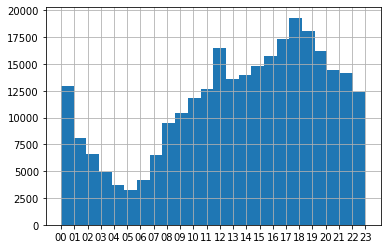

In [34]:
# replace Time column by hours
# print(sub_df['Time'].str.split(":"))
# for time in sub_df['Time']:
#     time = time.split(':')[0]

# for time in sub_df['Time']:
#     print(time)
import numpy as np
print(sub_df['Time'].unique())
sub_df['Time'] = sub_df['Time'].str.split(':').str[0] # Replace time with just hour

time_data = sub_df.sort_values(by=['Time'])
time_data = time_data['Time']

time_data.hist(bins = 24)

In [35]:
print(sub_df.head())

   Unnamed: 0       Category  DayOfWeek Time           X          Y
0           7       BURGLARY  Wednesday   20 -122.409530  37.765718
1           8  LARCENY/THEFT  Wednesday   18 -122.495225  37.753412
2           9  LARCENY/THEFT     Sunday   21 -122.475647  37.728528
3          10  DRUG/NARCOTIC    Tuesday   13 -122.412652  37.779513
4          11  LARCENY/THEFT    Tuesday   13 -122.466205  37.772541


In [36]:
sub_df.Category.value_counts()

LARCENY/THEFT                  101688
OTHER OFFENSES                  42690
ASSAULT                         27043
VANDALISM                       21061
BURGLARY                        13715
VEHICLE THEFT                   13591
SUSPICIOUS OCC                  13502
WARRANTS                        12434
DRUG/NARCOTIC                    8936
MISSING PERSON                   7943
ROBBERY                          7545
WEAPON LAWS                      3842
SEX OFFENSES, FORCIBLE           1907
PROSTITUTION                     1206
DISORDERLY CONDUCT               1146
DRUNKENNESS                       886
DRIVING UNDER THE INFLUENCE       768
ARSON                             706
KIDNAPPING                        383
LIQUOR LAWS                       174
SEX OFFENSES, NON FORCIBLE          5
Name: Category, dtype: int64

In [37]:
# Missing person doesnt state whether or not its a kidnapping, so maybe combine both
cond1 = sub_df['Category'] == 'MISSING PERSON'
cond2 = sub_df['Category'] == 'KIDNAPPING'
sub_df.loc[cond1, 'Category'] = 'MISSING PERSON/ KIDNAPPING'
sub_df.loc[cond2, 'Category'] = 'MISSING PERSON/ KIDNAPPING'

# Suspicious occ is just any suspicious activites, maybe linked with disorderly conduct and drunkenness
cond1 = sub_df['Category'] == 'SUSPICIOUS OCC'
cond2 = sub_df['Category'] == 'DRUNKENNESS'
sub_df.loc[cond1, 'Category'] = 'DISORDERLY CONDUCT'
sub_df.loc[cond2, 'Category'] = 'DISORDERLY CONDUCT'

# Forcible = ability to consent, Non-Forcible = inability to consent
cond1 = sub_df['Category'] == 'SEX OFFENSES, NON FORCIBLE'
cond2 = sub_df['Category'] == 'SEX OFFENSES, FORCIBLE'
sub_df.loc[cond1, 'Category'] = 'SEX OFFENSES'
sub_df.loc[cond2, 'Category'] = 'SEX OFFENSES'

# CA Penal Code states that ARSON "A person is guilty of arson when they willfully and 
# maliciously sets fire to or burns or causes to be burned or who aids, counsels, or 
# procures the burning of, any structure, forest land, or property."
# Vandlism is maliciously damaging, destroying or defacing another person's property.
# could be in the same category, but arson is more heavily punished

# Robbery = force of coercion, Burglary = illegal entrance of property, Theft/Larceny = w/o the prev two conds
# Vehicle Theft may be considered Burglary since it requires illegal entrance of property
# maybe combine all 4?

# 

In [38]:
sub_df.Category.value_counts()

LARCENY/THEFT                  101688
OTHER OFFENSES                  42690
ASSAULT                         27043
VANDALISM                       21061
DISORDERLY CONDUCT              15534
BURGLARY                        13715
VEHICLE THEFT                   13591
WARRANTS                        12434
DRUG/NARCOTIC                    8936
MISSING PERSON/ KIDNAPPING       8326
ROBBERY                          7545
WEAPON LAWS                      3842
SEX OFFENSES                     1912
PROSTITUTION                     1206
DRIVING UNDER THE INFLUENCE       768
ARSON                             706
LIQUOR LAWS                       174
Name: Category, dtype: int64